In [2]:
#18011092 ARDA KASIKCI
#Ana kütüphaneler
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
#Model kütüphaneleri
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [3]:
# Veri setinin yüklenmesi 
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
print("Train Boyutu: "+ str(X_train.shape))
print("Test Boyutu: "+ str(X_test.shape))

Train Boyutu: (50000, 32, 32, 3)
Test Boyutu: (10000, 32, 32, 3)


In [5]:
print(y_train[5])

[1]


In [6]:
# 80-20 Train-validation bölme işlemi
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 42, stratify=y_train)
print("Train Boyutu: "+ str(X_train.shape))
print("Validation Boyutu: "+ str(X_val.shape))

Train Boyutu: (40000, 32, 32, 3)
Validation Boyutu: (10000, 32, 32, 3)


In [7]:
# Derin öğrenme modellerinde sınıflandırma yapılırken, örnek olarak 10 numaralı sınıfın ağırlığının fazla gözükmemesi için one hot encoder uygulanır ve sınıf vektörüne dönüştürülür.
print("One Hot Encoding öncesi :"+ str(y_train[5]))
y_train = to_categorical(y_train, num_classes = 10, dtype ="int32")
y_test = to_categorical(y_test, num_classes = 10, dtype ="int32")
y_val = to_categorical(y_val, num_classes = 10, dtype ="int32")
print("One Hot Encoding sonrası: "+ str(y_train[5]))

One Hot Encoding öncesi :[2]
One Hot Encoding sonrası: [0 0 1 0 0 0 0 0 0 0]


In [20]:
labels =  {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

**Model1-3 CONV, 32 FİLTRE, 3X3 KERNEL**

In [ ]:
#Model kurulması
#Ezberlemeyi azaltmak için dropout eklendi.
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

#Model Sonucu
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_46 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 flatten_10 (Flatten)        (None, 5408)              0         
                                                     

In [ ]:
trained_model = model.fit(X_train, y_train, epochs = 30, batch_size=64 , verbose=1, validation_data=(X_val , y_val))

Epoch 1/30
625/625 [==============================] - 5s 8ms/step - loss: 2.9066 - accuracy: 0.2447 - val_loss: 1.7166 - val_accuracy: 0.3721
Epoch 2/30
625/625 [==============================] - 4s 6ms/step - loss: 1.6174 - accuracy: 0.4140 - val_loss: 1.4242 - val_accuracy: 0.4831
Epoch 3/30
625/625 [==============================] - 4s 6ms/step - loss: 1.4169 - accuracy: 0.4900 - val_loss: 1.2644 - val_accuracy: 0.5481
Epoch 4/30
625/625 [==============================] - 4s 6ms/step - loss: 1.2581 - accuracy: 0.5554 - val_loss: 1.1717 - val_accuracy: 0.5837
Epoch 5/30
625/625 [==============================] - 4s 7ms/step - loss: 1.1441 - accuracy: 0.5955 - val_loss: 1.1663 - val_accuracy: 0.5901
Epoch 6/30
625/625 [==============================] - 4s 6ms/step - loss: 1.0589 - accuracy: 0.6299 - val_loss: 1.0426 - val_accuracy: 0.6344
Epoch 7/30
625/625 [==============================] - 4s 7ms/step - loss: 0.9820 - accuracy: 0.6538 - val_loss: 1.0613 - val_accuracy: 0.6303
Epoch 

In [ ]:
trained_model.history

In [ ]:
# Testlerin değerlendirilmesi
print("Test değerlendirmesi")
results = model.evaluate(X_test, y_test, batch_size=64)
print("Test Loss - Test Accuracy:", results)

Test değerlendirmesi
157/157 [==============================] - 1s 5ms/step - loss: 1.2647 - accuracy: 0.6612
Test Loss - Test Accuracy: [1.26471745967865, 0.6611999869346619]


**Model2-3 CONV, 32 FİLTRE, 5X5 KERNEL**

In [ ]:
#Model kurulması
#Model eğitimi zorlaştığından dropout değeri azaltıldı.
model2 = Sequential()
model2.add(Conv2D(32,(5,5),input_shape = (32,32,3),activation='relu'))
model2.add(Conv2D(32,(5,5),activation='relu'))
model2.add(Conv2D(32,(5,5),activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(128, activation ='relu'))
model2.add(Dense(10, activation ='softmax'))
model2.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

#Model Sonucu
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 conv2d_60 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 conv2d_61 (Conv2D)          (None, 20, 20, 32)        25632     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 10, 10, 32)        0         
                                                                 
 flatten_15 (Flatten)        (None, 3200)              0         
                                                     

In [ ]:
trained_model2 = model2.fit(X_train, y_train, epochs = 20, batch_size=64 , verbose=1, validation_data=(X_val , y_val))

Epoch 1/20
625/625 [==============================] - 5s 7ms/step - loss: 2.2374 - accuracy: 0.2289 - val_loss: 1.9002 - val_accuracy: 0.3237
Epoch 2/20
625/625 [==============================] - 4s 7ms/step - loss: 1.6000 - accuracy: 0.4140 - val_loss: 1.4826 - val_accuracy: 0.4651
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 1.4343 - accuracy: 0.4814 - val_loss: 1.3181 - val_accuracy: 0.5329
Epoch 4/20
625/625 [==============================] - 4s 7ms/step - loss: 1.3029 - accuracy: 0.5370 - val_loss: 1.2555 - val_accuracy: 0.5547
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 1.2055 - accuracy: 0.5716 - val_loss: 1.2538 - val_accuracy: 0.5629
Epoch 6/20
625/625 [==============================] - 4s 7ms/step - loss: 1.1281 - accuracy: 0.6004 - val_loss: 1.2249 - val_accuracy: 0.5792
Epoch 7/20
625/625 [==============================] - 4s 7ms/step - loss: 1.0573 - accuracy: 0.6243 - val_loss: 1.1962 - val_accuracy: 0.5915
Epoch 

In [ ]:
trained_model2.history

{'loss': [2.237399101257324,
  1.6000006198883057,
  1.4343433380126953,
  1.3029383420944214,
  1.2055152654647827,
  1.1281436681747437,
  1.0573416948318481,
  0.9898406267166138,
  0.9245204925537109,
  0.8626170754432678,
  0.8102793097496033,
  0.7750903367996216,
  0.7221406102180481,
  0.6780364513397217,
  0.6565817594528198,
  0.6056069135665894,
  0.5824082493782043,
  0.5667172074317932,
  0.5264182686805725,
  0.5094220042228699],
 'accuracy': [0.22892500460147858,
  0.4139750003814697,
  0.4813750088214874,
  0.5370000004768372,
  0.5715500116348267,
  0.6003999710083008,
  0.6243000030517578,
  0.6512249708175659,
  0.6735249757766724,
  0.6959249973297119,
  0.7145249843597412,
  0.727524995803833,
  0.7458750009536743,
  0.7612000107765198,
  0.7681999802589417,
  0.7867249846458435,
  0.7968249917030334,
  0.8032249808311462,
  0.8159499764442444,
  0.8241000175476074],
 'val_loss': [1.9001517295837402,
  1.4826158285140991,
  1.318076729774475,
  1.2554960250854492,


In [ ]:
# Testlerin değerlendirilmesi
print("Test değerlendirmesi")
results = model2.evaluate(X_test, y_test, batch_size=64)
print("Test Loss - Test Accuracy:", results)

Test değerlendirmesi
157/157 [==============================] - 1s 4ms/step - loss: 1.4649 - accuracy: 0.5909
Test Loss - Test Accuracy: [1.4648563861846924, 0.5909000039100647]


**Model3-3 CONV, 64 FİLTRE, 3X3 KERNEL**

In [ ]:
#Model kurulması
#Model ezberlemeye yatkın olduğundan dropout katmanı 0.5 olarak ayarlandı.
model3 = Sequential()
model3.add(Conv2D(64,(3,3),input_shape = (32,32,3),activation='relu'))
model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(128, activation ='relu'))
model3.add(Dense(10, activation ='softmax'))
model3.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

#Model Sonucu
model3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_66 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_67 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_37 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 flatten_17 (Flatten)        (None, 10816)             0         
                                                     

In [ ]:
trained_model3 = model3.fit(X_train, y_train, epochs = 20, batch_size=32 , verbose=1, validation_data=(X_val , y_val))

Epoch 1/20
1250/1250 [==============================] - 10s 7ms/step - loss: 1.8300 - accuracy: 0.4063 - val_loss: 1.2842 - val_accuracy: 0.5390
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2427 - accuracy: 0.5576 - val_loss: 1.2127 - val_accuracy: 0.5857
Epoch 3/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0925 - accuracy: 0.6160 - val_loss: 1.0581 - val_accuracy: 0.6325
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9987 - accuracy: 0.6520 - val_loss: 1.0064 - val_accuracy: 0.6493
Epoch 5/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9212 - accuracy: 0.6759 - val_loss: 1.0248 - val_accuracy: 0.6560
Epoch 6/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8381 - accuracy: 0.7070 - val_loss: 1.0589 - val_accuracy: 0.6359
Epoch 7/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7806 - accuracy: 0.7278 - val_loss: 0.9948 - val_accuracy

In [ ]:
# Testlerin değerlendirilmesi

print("Test değerlendirmesi")
results = model3.evaluate(X_test, y_test, batch_size=32)
print("Test Loss - Test Accuracy:", results)

Test değerlendirmesi
313/313 [==============================] - 1s 4ms/step - loss: 1.2395 - accuracy: 0.6666
Test Loss - Test Accuracy: [1.2394671440124512, 0.6665999889373779]


**Model4-3 CONV, 64 FİLTRE, 5X5 KERNEL**

In [ ]:
#Model kurulması

model4 = Sequential()
model4.add(Conv2D(64,(5,5),input_shape = (32,32,3),activation='relu'))
model4.add(Conv2D(64,(5,5),activation='relu'))
model4.add(Conv2D(64,(5,5),activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(Dropout(0.5))
model4.add(Flatten())
model4.add(Dense(128, activation ='relu'))
model4.add(Dense(10, activation ='softmax'))
model4.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

#Model Sonucu
model4.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 conv2d_69 (Conv2D)          (None, 24, 24, 64)        102464    
                                                                 
 conv2d_70 (Conv2D)          (None, 20, 20, 64)        102464    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 10, 10, 64)        0         
                                                                 
 flatten_18 (Flatten)        (None, 6400)              0         
                                                     

In [ ]:
trained_model4 = model4.fit(X_train, y_train, epochs = 20, batch_size=32 , verbose=1, validation_data=(X_val , y_val))

Epoch 1/20
1250/1250 [==============================] - 119s 8ms/step - loss: 2.2116 - accuracy: 0.2072 - val_loss: 1.8111 - val_accuracy: 0.3361
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6879 - accuracy: 0.3737 - val_loss: 1.5609 - val_accuracy: 0.4329
Epoch 3/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5473 - accuracy: 0.4400 - val_loss: 1.4652 - val_accuracy: 0.4777
Epoch 4/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.4315 - accuracy: 0.4854 - val_loss: 1.3458 - val_accuracy: 0.5219
Epoch 5/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3401 - accuracy: 0.5222 - val_loss: 1.3488 - val_accuracy: 0.5215
Epoch 6/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2676 - accuracy: 0.5492 - val_loss: 1.2673 - val_accuracy: 0.5508
Epoch 7/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2044 - accuracy: 0.5727 - val_loss: 1.2897 - val_accurac

In [ ]:
# Testlerin değerlendirilmesi
#Ezberleme söz konusu, dropout ve katmanlar artıcak.
print("Test değerlendirmesi")
results = model4.evaluate(X_test, y_test, batch_size=32)
print("Test Loss - Test Accuracy:", results)

Test değerlendirmesi
313/313 [==============================] - 1s 4ms/step - loss: 1.3578 - accuracy: 0.5822
Test Loss - Test Accuracy: [1.357779860496521, 0.5821999907493591]


**Model5-5 CONV, 64 FİLTRE, 3X3 KERNEL**

In [ ]:
#Model kurulması

model5 = Sequential()
model5.add(Conv2D(64,(3,3),input_shape = (32,32,3),activation='relu'))
model5.add(Conv2D(64,(3,3),activation='relu'))
model5.add(Conv2D(64,(3,3),activation='relu'))
model5.add(Conv2D(64,(3,3),activation='relu'))
model5.add(Conv2D(64,(3,3),activation='relu'))
model5.add(MaxPooling2D(pool_size = (2,2)))
model5.add(Dropout(0.5))
model5.add(Flatten())
model5.add(Dense(128, activation ='relu'))
model5.add(Dense(10, activation ='softmax'))
model5.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

#Model Sonucu
model5.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_72 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 conv2d_73 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 conv2d_74 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 conv2d_75 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                     

In [ ]:
trained_model5 = model5.fit(X_train, y_train, epochs = 20, batch_size=64 , verbose=1, validation_data=(X_val , y_val))

Epoch 1/20
625/625 [==============================] - 11s 16ms/step - loss: 1.7481 - accuracy: 0.3860 - val_loss: 1.3644 - val_accuracy: 0.5068
Epoch 2/20
625/625 [==============================] - 10s 16ms/step - loss: 1.2985 - accuracy: 0.5349 - val_loss: 1.1362 - val_accuracy: 0.5965
Epoch 3/20
625/625 [==============================] - 10s 15ms/step - loss: 1.1347 - accuracy: 0.5975 - val_loss: 1.1034 - val_accuracy: 0.6169
Epoch 4/20
625/625 [==============================] - 10s 16ms/step - loss: 1.0208 - accuracy: 0.6397 - val_loss: 0.9810 - val_accuracy: 0.6557
Epoch 5/20
625/625 [==============================] - 10s 15ms/step - loss: 0.9360 - accuracy: 0.6703 - val_loss: 1.0267 - val_accuracy: 0.6411
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 0.8674 - accuracy: 0.6956 - val_loss: 0.9502 - val_accuracy: 0.6658
Epoch 7/20
625/625 [==============================] - 10s 16ms/step - loss: 0.7906 - accuracy: 0.7201 - val_loss: 0.9161 - val_accuracy:

In [ ]:
# Testlerin değerlendirilmesi
#Ezberleme var, dropout katmanları artıcak. Epoch sayısı arttırılacak.
print("Test değerlendirmesi")
results = model5.evaluate(X_test, y_test, batch_size=32)
print("Test Loss - Test Accuracy:", results)

Test değerlendirmesi
313/313 [==============================] - 1s 5ms/step - loss: 1.0627 - accuracy: 0.6956
Test Loss - Test Accuracy: [1.0626877546310425, 0.6955999732017517]


**Model6-5 CONV, 32 FİLTRE, 3X3 KERNEL**

In [12]:
#Model kurulması
#Model ezberlemeye yatkınlığından dropout sayısı arttırıldı.
model6 = Sequential()
model6.add(Conv2D(32,(3,3),input_shape = (32,32,3),activation='relu'))
model6.add(Conv2D(32,(3,3),activation='relu'))
model6.add(Dropout(0.20))
model6.add(Conv2D(32,(3,3),activation='relu'))
model6.add(Conv2D(32,(3,3),activation='relu'))
model6.add(Dropout(0.30))
model6.add(Conv2D(32,(3,3),activation='relu'))
model6.add(MaxPooling2D(pool_size = (2,2)))
model6.add(Dropout(0.40))
model6.add(Flatten())
model6.add(Dense(128, activation ='relu'))
model6.add(Dropout(0.30))
model6.add(Dense(10, activation ='softmax'))
model6.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

#Model Sonucu
model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 dropout_4 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 32)       

In [13]:
trained_model6 = model6.fit(X_train, y_train, epochs = 50, batch_size=64 , verbose=1, validation_data=(X_val , y_val))

Epoch 1/50
625/625 [==============================] - 7s 10ms/step - loss: 2.3172 - accuracy: 0.2214 - val_loss: 1.6959 - val_accuracy: 0.3900
Epoch 2/50
625/625 [==============================] - 6s 10ms/step - loss: 1.6414 - accuracy: 0.3938 - val_loss: 1.4856 - val_accuracy: 0.4939
Epoch 3/50
625/625 [==============================] - 6s 10ms/step - loss: 1.4978 - accuracy: 0.4565 - val_loss: 1.3642 - val_accuracy: 0.5182
Epoch 4/50
625/625 [==============================] - 6s 9ms/step - loss: 1.3984 - accuracy: 0.4963 - val_loss: 1.3146 - val_accuracy: 0.5412
Epoch 5/50
625/625 [==============================] - 6s 9ms/step - loss: 1.3214 - accuracy: 0.5293 - val_loss: 1.2213 - val_accuracy: 0.5740
Epoch 6/50
625/625 [==============================] - 6s 10ms/step - loss: 1.2629 - accuracy: 0.5500 - val_loss: 1.1480 - val_accuracy: 0.6021
Epoch 7/50
625/625 [==============================] - 6s 9ms/step - loss: 1.2035 - accuracy: 0.5745 - val_loss: 1.1141 - val_accuracy: 0.6198
Ep

In [14]:
# Testlerin değerlendirilmesi
#Eğitim başarısı için dropoutlar düzenlendi, sırayla arttırıldı.
print("Test değerlendirmesi")
results = model6.evaluate(X_test, y_test, batch_size=32)
print("Test Loss - Test Accuracy:", results)

Test değerlendirmesi
313/313 [==============================] - 1s 4ms/step - loss: 0.8376 - accuracy: 0.7204
Test Loss - Test Accuracy: [0.8375741243362427, 0.7203999757766724]


**Model7-5 CONV, 32 FİLTRE, 5X5 KERNEL**

In [ ]:
#Model kurulması
#Model ezberlemeye yatkınlığından dropout sayısı ve değerleri arttırıldı.
model7 = Sequential()
model7.add(Conv2D(32,(5,5),input_shape = (32,32,3),activation='relu'))
model7.add(Conv2D(32,(5,5),activation='relu'))
model7.add(Dropout(0.2))
model7.add(Conv2D(32,(5,5),activation='relu'))
model7.add(Conv2D(32,(5,5),activation='relu'))
model7.add(Conv2D(32,(5,5),activation='relu'))
model7.add(MaxPooling2D(pool_size = (2,2)))
model7.add(Dropout(0.25))
model7.add(Flatten())
model7.add(Dense(128, activation ='relu'))
model7.add(Dense(10, activation ='softmax'))
model7.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

#Model Sonucu
model7.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 28, 28, 32)        2432      
                                                                 
 conv2d_112 (Conv2D)         (None, 24, 24, 32)        25632     
                                                                 
 dropout_60 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_113 (Conv2D)         (None, 20, 20, 32)        25632     
                                                                 
 conv2d_114 (Conv2D)         (None, 16, 16, 32)        25632     
                                                                 
 conv2d_115 (Conv2D)         (None, 12, 12, 32)        25632     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 6, 6, 32)       

In [ ]:
trained_model7 = model7.fit(X_train, y_train, epochs = 50, batch_size=64 , verbose=1, validation_data=(X_val , y_val))

Epoch 1/50
625/625 [==============================] - 6s 9ms/step - loss: 2.0818 - accuracy: 0.2464 - val_loss: 1.7276 - val_accuracy: 0.3596
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 1.6751 - accuracy: 0.3832 - val_loss: 1.5678 - val_accuracy: 0.4207
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 1.5354 - accuracy: 0.4401 - val_loss: 1.5142 - val_accuracy: 0.4602
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 1.4447 - accuracy: 0.4787 - val_loss: 1.3804 - val_accuracy: 0.5056
Epoch 5/50
625/625 [==============================] - 5s 8ms/step - loss: 1.3721 - accuracy: 0.5084 - val_loss: 1.3504 - val_accuracy: 0.5128
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 1.3059 - accuracy: 0.5315 - val_loss: 1.2727 - val_accuracy: 0.5588
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 1.2743 - accuracy: 0.5451 - val_loss: 1.2834 - val_accuracy: 0.5440
Epoch 

In [ ]:
# Testlerin değerlendirilmesi
#Eğitim başarısı düştü ve eğitim zorlaştı dropoutlar düzenlenecek.
print("Test değerlendirmesi")
results = model7.evaluate(X_test, y_test, batch_size=32)
print("Test Loss - Test Accuracy:", results)

Test değerlendirmesi
313/313 [==============================] - 1s 4ms/step - loss: 1.1485 - accuracy: 0.6165
Test Loss - Test Accuracy: [1.1484942436218262, 0.6165000200271606]


**Model8-5 CONV, 64 FİLTRE, 5X5 KERNEL**

In [ ]:
#Model kurulması
#Model ezberlemeye yatkınlığından dropout sayısı ve değerleri arttırıldı.
model8 = Sequential()
model8.add(Conv2D(64,(5,5),input_shape = (32,32,3),activation='relu'))
model8.add(Conv2D(64,(5,5),activation='relu'))
model8.add(Dropout(0.25))
model8.add(Conv2D(64,(5,5),activation='relu'))
model8.add(Conv2D(64,(5,5),activation='relu'))
model8.add(Dropout(0.3))
model8.add(Conv2D(64,(5,5),activation='relu'))
model8.add(MaxPooling2D(pool_size = (2,2)))
model8.add(Dropout(0.4))
model8.add(Flatten())
model8.add(Dense(128, activation ='relu'))
model8.add(Dense(10, activation ='softmax'))
model8.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

#Model Sonucu
model8.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_116 (Conv2D)         (None, 28, 28, 64)        4864      
                                                                 
 conv2d_117 (Conv2D)         (None, 24, 24, 64)        102464    
                                                                 
 dropout_62 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_118 (Conv2D)         (None, 20, 20, 64)        102464    
                                                                 
 conv2d_119 (Conv2D)         (None, 16, 16, 64)        102464    
                                                                 
 dropout_63 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_120 (Conv2D)         (None, 12, 12, 64)      

In [ ]:
trained_model8 = model8.fit(X_train, y_train, epochs = 50, batch_size=64 , verbose=1, validation_data=(X_val , y_val))

Epoch 1/50
625/625 [==============================] - 61s 14ms/step - loss: 2.1662 - accuracy: 0.2414 - val_loss: 1.7559 - val_accuracy: 0.3631
Epoch 2/50
625/625 [==============================] - 9s 14ms/step - loss: 1.6884 - accuracy: 0.3770 - val_loss: 1.6380 - val_accuracy: 0.4081
Epoch 3/50
625/625 [==============================] - 8s 13ms/step - loss: 1.5750 - accuracy: 0.4235 - val_loss: 1.5157 - val_accuracy: 0.4461
Epoch 4/50
625/625 [==============================] - 8s 14ms/step - loss: 1.4939 - accuracy: 0.4571 - val_loss: 1.4143 - val_accuracy: 0.4893
Epoch 5/50
625/625 [==============================] - 9s 15ms/step - loss: 1.4323 - accuracy: 0.4807 - val_loss: 1.3736 - val_accuracy: 0.5080
Epoch 6/50
625/625 [==============================] - 9s 14ms/step - loss: 1.3700 - accuracy: 0.5057 - val_loss: 1.3256 - val_accuracy: 0.5236
Epoch 7/50
625/625 [==============================] - 9s 14ms/step - loss: 1.3344 - accuracy: 0.5209 - val_loss: 1.4258 - val_accuracy: 0.488

In [ ]:
# Testlerin değerlendirilmesi
print("Test değerlendirmesi")
results = model8.evaluate(X_test, y_test, batch_size=32)
print("Test Loss - Test Accuracy:", results)

Test değerlendirmesi
313/313 [==============================] - 1s 4ms/step - loss: 1.0582 - accuracy: 0.6394
Test Loss - Test Accuracy: [1.058220624923706, 0.6394000053405762]


**En İyi Model için Confusion Matrix- Model 6 -5 CONV, 32 FİLTRE, 3X3 KERNEL**

In [16]:
#Conf Matrix için prediction alınması
y_pred = model6.predict(X_test)
print(y_pred)
print(y_test)

313/313 [==============================] - 1s 2ms/step
[[5.70817059e-03 1.05459499e-03 8.06594640e-02 ... 2.17484012e-02
  7.67384320e-02 9.54868458e-03]
 [1.86585984e-03 1.98923820e-03 5.17768939e-08 ... 2.06379809e-11
  9.96106565e-01 3.82565922e-05]
 [1.41097391e-02 4.46872085e-01 1.45339567e-04 ... 2.24275882e-05
  5.17500699e-01 2.10113637e-02]
 ...
 [2.14556439e-06 2.05526209e-08 2.07873271e-03 ... 7.46492995e-03
  2.90588588e-07 9.61457900e-08]
 [2.49653636e-03 9.95855153e-01 7.81136123e-07 ... 1.01473795e-07
  1.74126978e-06 1.64507772e-03]
 [6.38052242e-08 2.40581910e-09 3.26708891e-06 ... 9.94529188e-01
  5.24094901e-09 3.50137626e-08]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [17]:
#Test ve prediction değerleri one hot encoder'a göre geldiğinden bu değerleri sınıf numarasına çevirdim.
Y_test = np.argmax(y_test, axis=1)
print(Y_test)

Y_pred= np.argmax(y_pred, axis=1) 
print(Y_pred)

[3 8 8 ... 5 1 7]
[3 8 8 ... 5 1 7]


[[694  18  59  15  18  13   4   9 135  35]
 [ 12 878   3   2   2   3   3   3  27  67]
 [ 63   5 540  40 121  85  53  53  27  13]
 [ 30   8  57 341  92 315  66  46  27  18]
 [ 23   2  44  27 733  35  27  87  16   6]
 [  7   5  42  78  42 730  11  72   9   4]
 [ 12   4  47  46  57  43 766  11  10   4]
 [  9   5  22  22  36  81   4 802   9  10]
 [ 44  22  10   9   5   5   2   4 880  19]
 [ 16  79   1   8   4   4   4   4  40 840]]


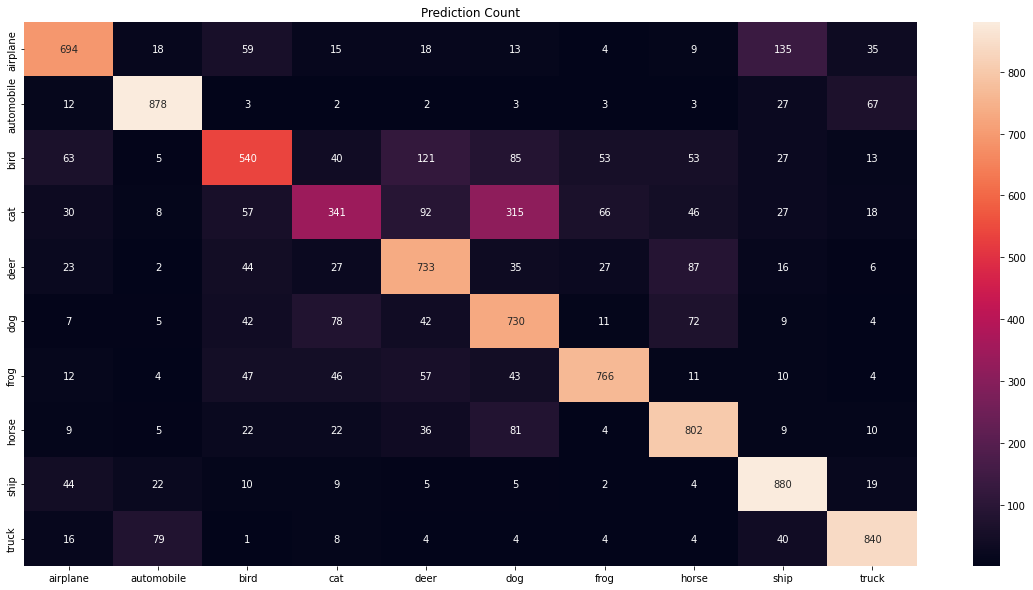

In [42]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

plt.figure(figsize=(20,10))
plt.title('Prediction Count')
sns.heatmap(cm,xticklabels=labels.values(),yticklabels=labels.values(),annot=True,fmt='d')
plt.show()

In [23]:
print(Y_test[10])
print(Y_test[30])
test_set = []

0
6


In [35]:
#Her sınıf için 3'er örnek almak için for döngüsü yapıldı. El ile sınıf indeksini arttırarak rastgele örnek topladım.
count = 0
for i in range(0,len(Y_test),100):
  if count<3:
    if Y_test[i] == 0:#Sınıf indeksi
      test_set.append(i)
      count = count+1
  else:
    break

print(Y_test[test_set])


[0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 7 7 7 8 8 8 9 9 9]


In [36]:
print(Y_test[test_set])
print(test_set)

[0 0 0 1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 7 7 7 8 8 8 9 9 9]
[2200, 2400, 3100, 1500, 2000, 3500, 900, 2100, 5800, 0, 2300, 2900, 100, 500, 1300, 200, 1000, 1400, 300, 3400, 4700, 700, 800, 1100, 600, 1200, 1600, 400, 2700, 3800]


In [70]:
k=0
for i in test_set:
  print(str(k) +".png :" + labels[Y_test[i]])
  k = k+1
  predicted = model6.predict(X_test[i].reshape(1,32,32,3))
  for j in range(0,10):
    print("Predicted as :",labels[j]," with probabilty: ",format(predicted[0][j], 'f'))
  print("----------------------------------------------------------------------------")


0.png :airplane
1/1 [==============================] - 0s 17ms/step
Predicted as : airplane  with probabilty:  0.443957
Predicted as : automobile  with probabilty:  0.000109
Predicted as : bird  with probabilty:  0.500233
Predicted as : cat  with probabilty:  0.001612
Predicted as : deer  with probabilty:  0.010770
Predicted as : dog  with probabilty:  0.000511
Predicted as : frog  with probabilty:  0.009047
Predicted as : horse  with probabilty:  0.000062
Predicted as : ship  with probabilty:  0.033631
Predicted as : truck  with probabilty:  0.000068
----------------------------------------------------------------------------
1.png :airplane
1/1 [==============================] - 0s 14ms/step
Predicted as : airplane  with probabilty:  0.990003
Predicted as : automobile  with probabilty:  0.000006
Predicted as : bird  with probabilty:  0.006392
Predicted as : cat  with probabilty:  0.000042
Predicted as : deer  with probabilty:  0.000145
Predicted as : dog  with probabilty:  0.000049
P

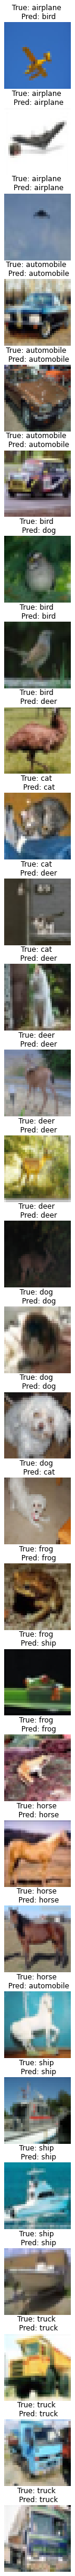

In [49]:
fig,plts=plt.subplots(30,1,figsize=(60,60))
plts=plts.ravel()
fig.tight_layout()

for i in np.arange(0,30):
        plts[i].imshow(X_test[test_set[i]])
        plts[i].set_title('True: %s \n Pred: %s'%(labels[Y_test[test_set[i]]],labels[Y_pred[test_set[i]]]))
        plts[i].axis("off")

plt.show()

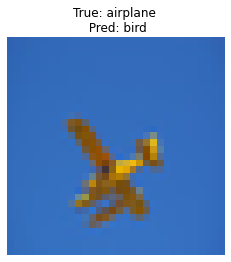

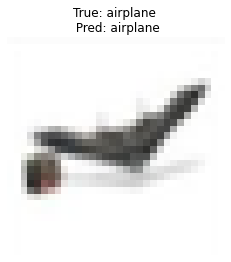

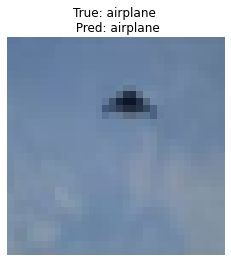

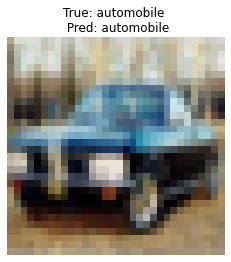

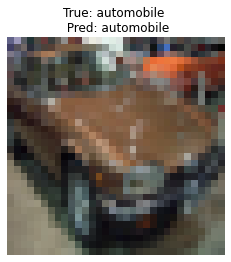

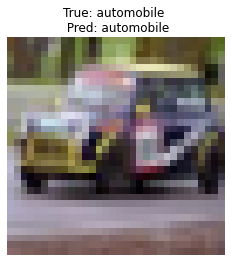

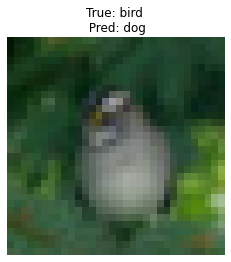

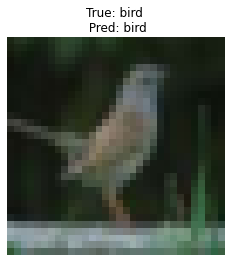

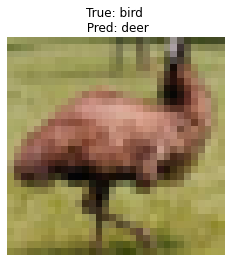

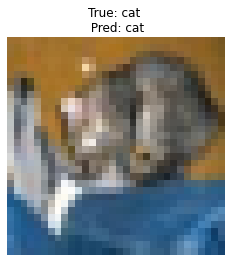

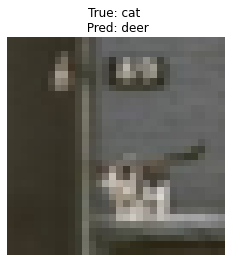

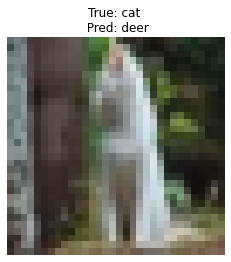

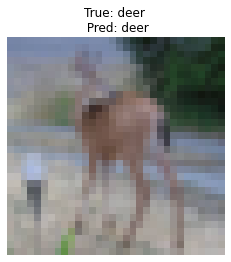

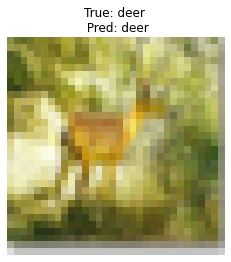

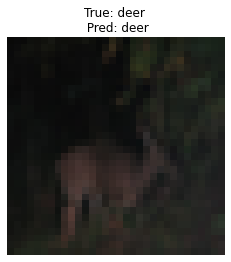

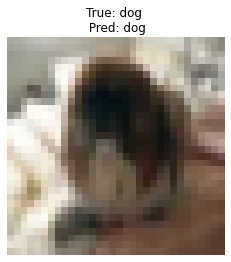

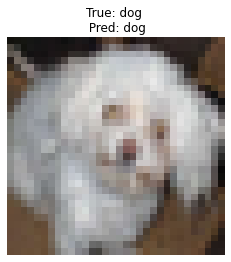

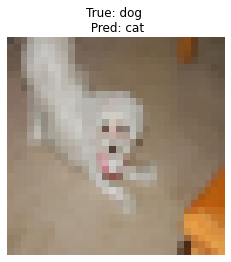

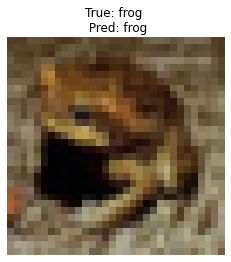

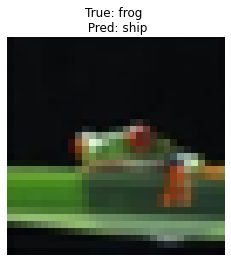

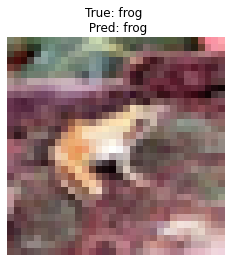

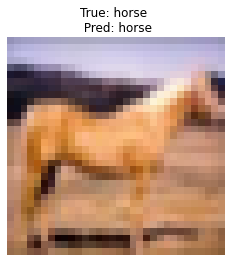

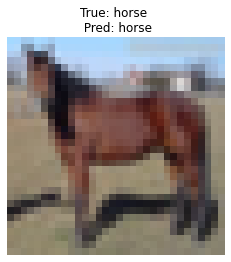

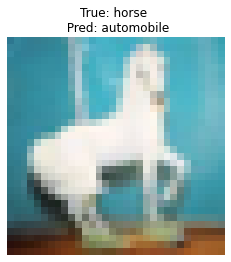

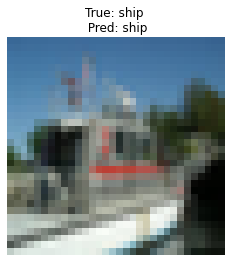

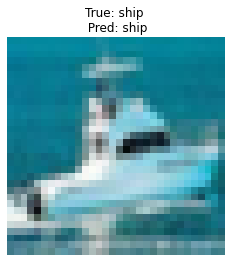

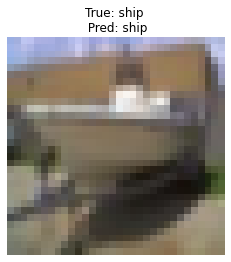

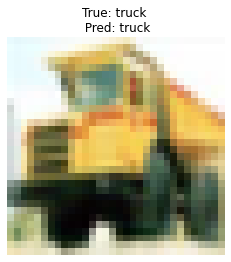

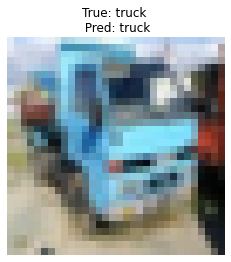

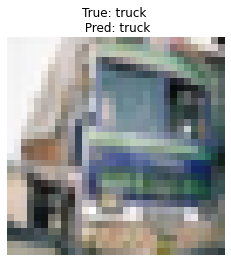

In [67]:
for i in np.arange(0,30):
        plt.imshow(X_test[test_set[i]])
        plt.title('True: %s \n Pred: %s'%(labels[Y_test[test_set[i]]],labels[Y_pred[test_set[i]]]))
        plt.axis("off")
        plt.savefig(str(i) + '.png')
        plt.show()

In [ ]:
y_new_pred = []
y_new_test = []

for i in test_set:
  y_new_pred.append(Y_pred[i])
  y_new_test.append(Y_test[i])


#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_new_test,y_new_pred)

plt.figure(figsize=(20,10))
plt.title('Prediction Count')
sns.heatmap(cm,xticklabels=labels.values(),yticklabels=labels.values(),annot=True,fmt='d')
plt.show()